In [ ]:
import pandas as pd
import os

def calculate_target_variables():
    # assign values to variables
    a = float(input("Enter 1-1 semester percentage: "))
    b = float(input("Enter 1-2 semester percentage: "))
    c = float(input("Enter 2-1 semester percentage: "))
    d = float(input("Enter 2-2 semester percentage: "))
    e = float(input("Enter 3-1 semester percentage: "))
    f = float(input("Enter 3-2 semester percentage: "))
    g = float(input("Enter attendance percentage: "))
    h = input("Do you have any extracurricular activities? (yes/no) ")
    i = input("Do you have any academic awards and achievements? (yes/no) ")
    j = input("Do you have coding skills? (yes/no) ")
    
    # create a list of semester grades
    semester_grades = [a, b, c, d, e, f]
    
    # calculate dropout
    dropout = 1 if min(semester_grades) < 35 and g < 30 else 0
    
    # calculate good performance
    good_performance = 1 if all(grade > 60 for grade in semester_grades) else 0
    
    # calculate poor performance
    poor_performance = 1 if max(semester_grades) < 40 else 0
    
    # calculate support required
    support_required = 1 if any(40 <= grade < 60 for grade in semester_grades) else 0
    
    # calculate eligibility for placement
    eligible_for_placement = 1 if all(grade > 65 for grade in semester_grades) and (j.lower() == "yes" or i.lower() == "yes" or h.lower() == "yes") else 0
    
    # create a dictionary with the results
    results= {"1-1": a,
               "1-2": b,
               "2-1": c,
               "2-2": d,
               "3-1": e,
               "3-2": f,
               "attendance": g,
               "extracurricular_activities": h,
               "academic_awards": i,
               "coding_skills": j,
               "dropout": dropout,
               "good_performance": good_performance,
               "poor_performance": poor_performance,
               "support_required": support_required,
               "eligible_for_placement": eligible_for_placement}
    
    # return the results
    return results


# create a list to store the results
results_list = []
# check if the CSV file exists
if os.path.exists("results.csv"):
    # read the existing df from the CSV file
    existing_df = pd.read_csv("results.csv")
else:
    # create an empty dfFrame
    existing_df = pd.DataFrame()

# call the function to calculate the target variables
results= calculate_target_variables()

# convert the dictionary of results to a dfFrame
new_df = pd.DataFrame([results])
# append the new df to the existing dfFrame
new_df = pd.concat([existing_df, new_df], ignore_index=True)
# save the dfFrame to the CSV file
new_df.to_csv("results.csv",index=False)


Enter 1-1 semester percentage: 87
Enter 1-2 semester percentage: 66
Enter 2-1 semester percentage: 78
Enter 2-2 semester percentage: 77
Enter 3-1 semester percentage: 76
Enter 3-2 semester percentage: 67
Enter attendance percentage: 75
Do you have any extracurricular activities? (yes/no) yes
Do you have any academic awards and achievements? (yes/no) yes
Do you have coding skills? (yes/no) yes


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving student_performance.csv to student_performance (1).csv


In [ ]:
# 2. Load the dfset of student academic performance metrics
data = pd.read_csv("student_performance.csv")
print(data)

    01-Jan  01-Feb  02-Jan  02-Feb  03-Jan  03-Feb  attendance  \
0     80.5    75.0    85.5    81.0    90.0    85.0          75   
1     65.0    60.5    70.5    65.5    72.5    68.5          80   
2     45.0    50.0    60.5    55.0    62.0    58.0          60   
3     80.0    75.0    85.5    81.0    90.0    85.5          75   
4     80.5    75.0    85.5    81.0    90.0    85.5          75   
5     64.0    60.5    70.5    65.5    72.5    68.5          80   
6     45.0    50.0    60.5    55.0    62.0    58.0          60   
7     70.0    68.0    72.0    70.5    75.0    73.0          90   
8     85.0    80.0    87.5    82.0    92.0    88.0          80   
9     50.0    55.0    60.0    65.0    70.0    68.0          50   
10    90.0    85.0    92.5    88.0    95.0    92.0          95   
11    75.0    72.0    77.5    74.0    80.5    78.5          85   
12    40.0    45.0    50.0    55.0    60.0    58.0          40   
13    55.0    60.0    62.0    65.5    70.0    68.5          70   
14    20.0

In [ ]:
data = data.drop_duplicates()
data = data.reset_index(drop=True)

In [ ]:
print(data)

    01-Jan  01-Feb  02-Jan  02-Feb  03-Jan  03-Feb  attendance  \
0     80.5    75.0    85.5    81.0    90.0    85.0          75   
1     65.0    60.5    70.5    65.5    72.5    68.5          80   
2     45.0    50.0    60.5    55.0    62.0    58.0          60   
3     80.0    75.0    85.5    81.0    90.0    85.5          75   
4     80.5    75.0    85.5    81.0    90.0    85.5          75   
5     64.0    60.5    70.5    65.5    72.5    68.5          80   
6     70.0    68.0    72.0    70.5    75.0    73.0          90   
7     85.0    80.0    87.5    82.0    92.0    88.0          80   
8     50.0    55.0    60.0    65.0    70.0    68.0          50   
9     90.0    85.0    92.5    88.0    95.0    92.0          95   
10    75.0    72.0    77.5    74.0    80.5    78.5          85   
11    40.0    45.0    50.0    55.0    60.0    58.0          40   
12    55.0    60.0    62.0    65.5    70.0    68.5          70   
13    20.0    24.0    22.0    28.0    33.0    35.0          45   
14    30.0

Clean the df

In [ ]:
'''data= data.dropna()
X = data.iloc[:, :14].values
y = data.iloc[:, 14:].values'''
data['cumulative_percentage'] = data.sum(axis=1)
data['performance'] = np.where(data['good_performance']==1, 'good',
                               np.where(data['poor_performance']==1, 'poor',
                                        np.where(data['support_required']==1, 'support',
                                                 np.where(data['dropout']==1, 'dropout', 'unknown'))))


<ipython-input-28-69862e06c460>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['cumulative_percentage'] = data.sum(axis=1)


In [ ]:
# Displaying the output of academic performance
print(data[['cumulative_percentage', 'performance']].sort_values(by='cumulative_percentage', ascending=False))


    cumulative_percentage performance
9                   637.5     unknown
7                   596.5        good
4                   574.5        good
0                   574.0        good
3                   574.0        good
10                  544.5        good
6                   520.5        good
1                   483.5        good
5                   482.5        good
12                  452.0     support
8                   419.0     support
2                   391.5     support
11                  349.0     support
14                  241.0        poor
15                  218.0     support
13                  208.0        poor


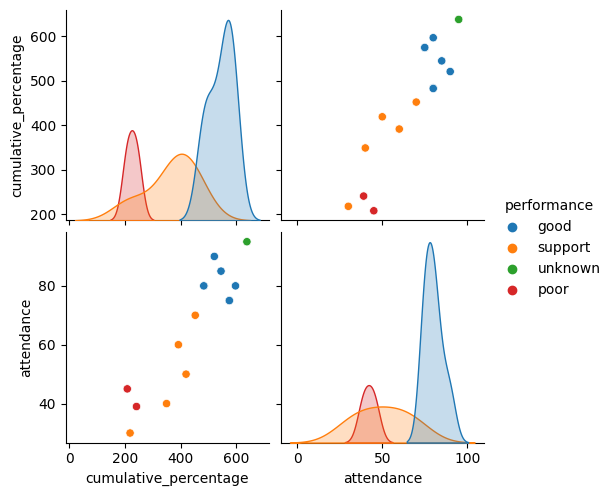

In [ ]:
'''cumulative_percentage = np.sum(X[:, [0,2,4,6]]/2, axis=1)
good_performers = np.where(cumulative_percentage>=75, 1, 0)
poor_performers = np.where(cumulative_percentage<50, 1, 0)
support_required = np.where((cumulative_percentage>=50) & (cumulative_percentage<75), 1, 0)
dropout = y[:, 0]
placement_eligibility = y'''
import seaborn as sns
sns.pairplot(data[['cumulative_percentage', 'attendance', 'extracurricular_activities', 'academic_awards', 'coding_skills', 'performance']], hue='performance') 

In [ ]:
# Convert 'yes' and 'no' to numerical values
data['good_performance'] = data['good_performance'].replace({'yes': 1, 'no': 0})
data['poor_performance'] = data['poor_performance'].replace({'yes': 1, 'no': 0})
data['support_required'] = data['support_required'].replace({'yes': 1, 'no': 0})
data['dropout'] = data['dropout'].replace({'yes': 1, 'no': 0})
data['coding_skills'] = data['coding_skills'].replace({'yes': 1, 'no': 0})
data['academic_awards'] = data['academic_awards'].replace({'yes': 1, 'no': 0})
data['extracurricular_activities'] = data['extracurricular_activities'].replace({'yes': 1, 'no': 0})
print(data)

    01-Jan  01-Feb  02-Jan  02-Feb  03-Jan  03-Feb  attendance  \
0     80.5    75.0    85.5    81.0    90.0    85.0          75   
1     65.0    60.5    70.5    65.5    72.5    68.5          80   
2     45.0    50.0    60.5    55.0    62.0    58.0          60   
3     80.0    75.0    85.5    81.0    90.0    85.5          75   
4     80.5    75.0    85.5    81.0    90.0    85.5          75   
5     64.0    60.5    70.5    65.5    72.5    68.5          80   
6     70.0    68.0    72.0    70.5    75.0    73.0          90   
7     85.0    80.0    87.5    82.0    92.0    88.0          80   
8     50.0    55.0    60.0    65.0    70.0    68.0          50   
9     90.0    85.0    92.5    88.0    95.0    92.0          95   
10    75.0    72.0    77.5    74.0    80.5    78.5          85   
11    40.0    45.0    50.0    55.0    60.0    58.0          40   
12    55.0    60.0    62.0    65.5    70.0    68.5          70   
13    20.0    24.0    22.0    28.0    33.0    35.0          45   
14    30.0

In [ ]:
# Preparing the data for the LSTM model
X = data[['01-Jan', '01-Feb', '02-Jan', '02-Feb', '03-Jan', '03-Feb', 'attendance', 'extracurricular_activities', 'academic_awards', 'coding_skills']].values.astype('float32')
y = data[['good_performance', 'poor_performance', 'support_required', 'dropout']].values.astype('float32')

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Reshaping the input data into the required format for LSTM modeling
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
# Building and compiling the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(4, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Training the LSTM model on the training data
history=model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.7845 - accuracy: 0.0000e+00 - val_loss: 0.7789 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 41ms/step - loss: 0.7537 - accuracy: 0.0000e+00 - val_loss: 0.7520 - val_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 39ms/step - loss: 0.7244 - accuracy: 0.0833 - val_loss: 0.7271 - val_accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 45ms/step - loss: 0.6971 - accuracy: 0.2500 - val_loss: 0.7045 - val_accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 59ms/step - loss: 0.6720 - accuracy: 0.4167 - val_loss: 0.6843 - val_accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 40ms/step - loss: 0.6495 - accuracy: 0.4167 - val_loss: 0.6666 - val_accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 41ms/step - loss: 0.6295 - accuracy: 0.4167 - val_loss: 0.6501 - val_accuracy: 0.00

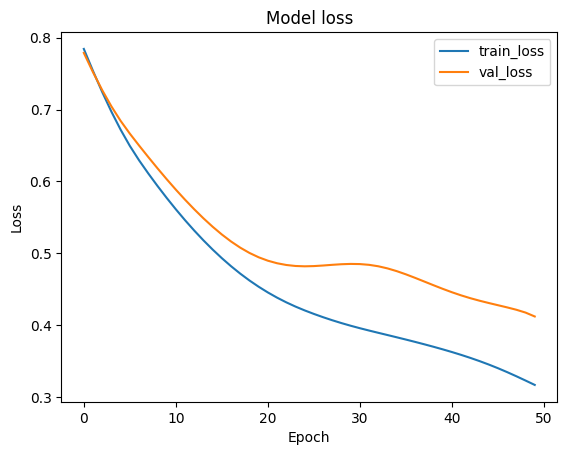

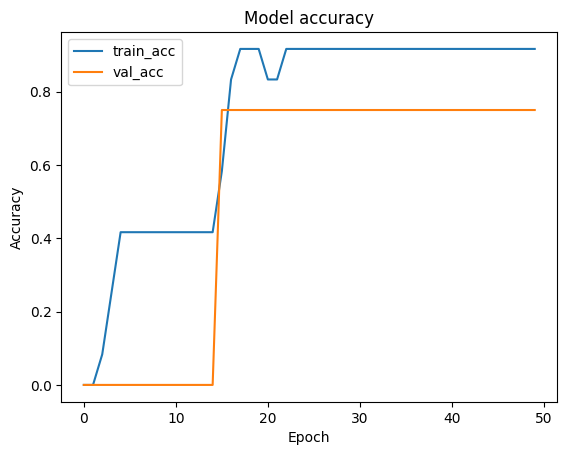

In [ ]:
# Plotting the training and validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Evaluating the LSTM model and printing accuracies
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {scores[1]*100}")

Accuracy: 75.0
